# Two-layer XOR 

## Problem statement:

Using Backpropagation algorithm to train a two layer **XOR** problem.
Let us define a one hidden layer network with two input units, N hidden layer
units and one output unit, with training set of D data samples, using the following
notation:


1. The input vector for two units as $x^{d} = (x^{d}_{1}, x^{d}_{2})$ or $x^{d}_{i}$; i = 1, 2, d = 1, .. . , D. (For the XOR problem introduced below, 4 data points exist in the dataset $x_{1}= (1, 0), x_{2}= (1, 1), x_{3} = (0, 1), x_{4} = (0, 0).)$
     
     
2. the hidden layer with N units as $h_{j}$; j = 1, . . . N. Each of these units (orneurons) is connected to all the units of the previous layer with a weight $w^{1}_{ji}$. Here j refers to the unit index of the hidden layer and the i refers to the unit index of the previous layer.


3. the non-linear function ReLu(t) = max(0, t).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
# Hidden Units Number
HUN = 2

# Input Units Number
IUN = 2

# Output Units Number
OUN = 1

segma = 0.5

# The speed of descent/learning
eta = 0.1

In [3]:
def ReLu(t) :
    return (t > 0) * t

### Forward Calculations:
The output is then computed as follows:

$$y(x^d​, w^1​, w^2​, b^2​, b^3​) = ReLu( \sum_{j=1}^{N} [w^{2}_{j} Relu( b^{2}_{j} + \sum_{i= 1}^{2} w^{1}_{ji} x^{d}_{i}) + b_{3}])$$

In [4]:
def forward(X) :
    global W1, W2, B2, B3
    return ReLu(B3 + W2 @ ReLu(B2 + W1 @ X.T))

### Loss Functions:
The loss function we use for training in this homework is:
$$E_λ​( w^1​, w^2​, b^2​, b^3​)= \frac{1}{D} \sum_{d = 1}^{D}​E^d_λ(w^1​, w^2​, b^2​, b^3​)$$
Where:
$$E_λ ( w^1​, w^2​, b^2​, b^3​)) = (y(x^d​, w^1​, w^2​, b^2​, b^3​) − t^d​)^2​+ λ (|w^1​|^2​+ |w^2​|^2​+|b^2​|^2 + |b^2​|^2​)$$
and λ is a hyperparameter.

In [5]:
def loss (estimated_y, exact_y, norm = np.linalg.norm) :
    global W1, W2, B2, B3
    return (estimated_y - exact_y)**2 + segma * ((norm(W1))**2 + (norm(W2))**2 + (norm(B2))**2 + (norm(B3))**2)

### Gradient Descent:
The general formula for updating the weights and bias is via gradient descent, where the steps are indexed by τ = 1, . . . , T, where T is the stopping criteria, another hyperparameter to be estimated.
- $w^{1,2}(τ + 1)= w^{1,2}(τ) − η​\sum^{D}_{d=1}​\frac{\partial E}{\partial w^{1,2} (τ)}$
- $b^{2\,3}​(τ + 1) = b^{2\,3}​(τ) − η​\sum^D_{d=1}​\frac{\partial{E}}{\partial b^{2\,3} (τ)}$

where η, the speed of descent/learning is a hyper-parameter to be estimated

#### Computing these gradients:
In order to compute these formulae more precisely, we will need the derivative of the Relu(t) function, which can be readily derived

$\frac{\partial Rule(t)}{\partial t}$ = (1 if t ≥ 0) and (0 if t < 0)

##### ● Top Layer​:
$\frac{\partial E}{\partial w^2}​= 2λw^2​+ [ 2(y − t^d​)h $ (if y > 0 else 0)] where h is the output of the hidden layer.

$\frac{\partial E}{\partial b^3} = 2λb^3​+ [ 2(y − t^d​)$ (if y > 0 else 0)]

##### ● Bottom Layer:
$\frac{\partial E}{\partial w^1}​= 2λw^1​+ [ 2(y − t^d​)w^2​x^d​$(if y > 0 else 0)]

$\frac{\partial E}{\partial b^2}= 2λb^2​+ [ 2(y − t^d​)w^2​$(if y > 0 else 0)]

In [6]:
def gradient(estimated_y, exact_y, X) :
    global W1, W2, B2, B3
    condition_flag = estimated_y > 0
    W1 -= eta * (2 * segma * W1 + (2 * (estimated_y - exact_y) * (W2.T @ X))) * condition_flag
    W2 -= eta * (2 * segma * W2 + (2 * (estimated_y - exact_y) * (ReLu(B2 + W1 @ X.T)).T)) * condition_flag
    B2 -= eta * (2 * segma * B2 + (2 * (estimated_y - exact_y) * W2.T)) * condition_flag
    B3 -= eta * (2 * segma * B3 + (2 * (estimated_y - exact_y)))

### Training Algoritm:
- Let N=2, λ=0.5, η=0.1 

- The back propagation algorithm works by first (at step τ = 0) initializing all the weights and bias at small random values (with zero mean). Then we loop for τ = 1, . . . T and each step we loop for the training data d = 1, . . . , D and for each training pair $(x^d , t^d )$  compute the gradient for each of the parameters (weights and bias).

- Plot a graph of the average loss $E_λ​(w^1​, w^2​, b^2​)$ versus τ.
- These plots will help you choose the hyper-parameter T, the stoppage step where the loss does not decrease.
- Report the final T and loss.

In [7]:
def network_function(X, exact_y, precision) :
    global W1, W2, B2, B3
    D = len(exact_y)
    previous_loss = sys.maxsize
    x_points = []
    y_points = []
    steps = 1
    average_loss = 0
    while True:
        for i in range(D):
            x = (X[i])[None, :]
            estimated_y = forward(x)
            current_loss = loss(estimated_y, exact_y[i]).sum()
            gradient(estimated_y, exact_y[i], x)
            average_loss += current_loss
        average_loss /= D
        x_points.append(steps)
        y_points.append(average_loss.sum())  
        if previous_loss - average_loss <= precision: break
        previous_loss = average_loss
        average_loss = 0
        steps += 1
    print("Loss reached:{} after T = {} iterations".format(average_loss, steps))
    plt.plot(x_points, y_points)
    plt.xlabel('T')
    plt.ylabel('Loss')
    plt.show()

Loss reached:0.3904934818452397 after T = 18 iterations


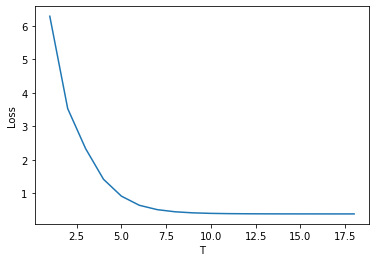

In [8]:
Xd = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])


W1 = np.random.randn(HUN, IUN)
W2 = np.random.randn(OUN, HUN)
B2 = np.random.randn(HUN, OUN)
B3 = np.random.randn(OUN, OUN)

Y = np.array([0, 1, 1, 0])
network_function(Xd, Y, 0.0001)